In [237]:
import pandas as pd
import numpy as np

In [238]:
#Binomial Probability Distribution  (BPD)
import math

def get_comb(n,r):
    return math.factorial(n)/(math.factorial(r)*math.factorial(n-r))

#Actual method to get binomial probability
def get_prob(n, r, p):
    if r == 0:
        return (1-p)**n
    else:
        return get_comb(n,r)*(p**r)*((1-p)**(n-r))

In [239]:
#Testing the BPD function
get_prob(10,2,0.5)

0.0439453125

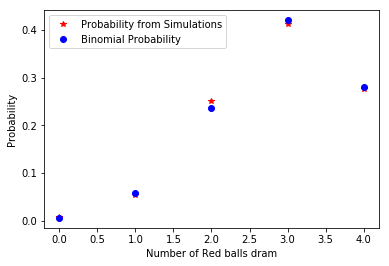

In [240]:
b = [1,1,1,0,1,1,0,1,0,1,1]  # 1 for Red and 0 for blue
n = 4 # Number of Tries
s = 2000 # Number of Simulations

import random
tests = [] #For holding Simulations results

#Simulations
for i in range(0,s):
    temp = []
    for i in range(0,4):
        temp.append(random.sample(b, 1)[0])
    tests.append(temp)

#Getting the occurance of 1 in list b, which is further required to find Probability
def get_count(l):
    res = 0
    for i in l:
        if i == 1:
            res = res + i
    return res

#Storing the number of times 0,1,2,3,4 balls were drawn from b
d={}
for i in tests:
    if count(i) in d.keys():
        d[count(i)] = d[count(i)] + 1
    else:
        d[count(i)] = 1

#Getting Binomial Distribution Probabilities for 0,1,2,3,4
d1 = {}

p = get_count(b)/len(b)
for i in range(0,n+1):
    d1[i] = round(float(get_prob(n, i, p)), 3)


#Converting to data frames for plotting
df = pd.DataFrame(d.values(), index=d.keys())

df = df.sort_index()

df = df[0]/r

df1 = pd.DataFrame(d1.values(), index=d1.keys())

#plotting the 
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df, "r*", label="Probability from Simulations")
plt.plot(df1, "bo", label="Binomial Probability")
plt.xlabel("Number of Red balls dram")
plt.ylabel("Probability")
plt.legend()

In [277]:
#Lets experiment for expected value

#Condition
# If a person gets 4 reds i.e. r=4, let's pay him Rs.150(values = +150) and 
# anything else we get Rs.10(so the value is -10)
def evaluate_EV(prob_dict, pay_max = 150, charge_max = 10, step=5, charge_const=False, pay_const=False):
    EV=0
    #Let's take the probabilities we got by BPD while calculating expect value
    for i in prob_dict.keys():
        if i > 3:
            EV = EV + pay_max*prob_dict[i]
        else:
            EV = EV - charge_max*prob_dict[i]

    #lets keep Charge money increasing and prize money decreasing    
    if (not charge_const) and (not pay_const):           
        if round(EV, 2) > 0:
            EV = evaluate_EV(prob_dict=d1, pay_max=pay_max-step, charge_max=charge_max+step, step=step)
        else:
            #print("Printing for all non const")
            print("Prize Money "+str(pay_max))
            print("Charge Money "+str(charge_max))
            return(round(EV,2))
    
    #lets keep Charge money constant  
    if charge_const:      
        if round(EV, 2) > 0:
            EV = evaluate_EV(prob_dict=d1, pay_max=pay_max-step, charge_max=charge_max, step=ste, charge_const=True)
        else:
            print("Prize Money "+str(pay_max))
            print("Charge Money "+str(charge_max))
            return(round(EV,2))
    return(EV)

#print(evaluate_EV(prob_dict=d1,pay_max=150,charge_max=20,step=5))

print("Expected Value: "+str(evaluate_EV(prob_dict=d1,pay_max=150,charge_max=20,step=5,charge_const=False)))


Prize Money 120
Charge Money 50
Expected Value: -2.45
